In [1]:
import pandas as pd
import numpy as np

In [2]:
#Reading file into a pandas dataframe
house_data = pd.read_csv('Bangalore.csv')
house_data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [4]:
#Getting a list of columns
print(house_data.columns)

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')


In [5]:
house_data.rename(columns = {'No. of Bedrooms':'noOfBedrooms'}, inplace = True)

In [6]:
#Choose x and y variables- x stores independent variables and y stores dependent variable(the value to be predicted)
x = house_data[['Area','noOfBedrooms','Resale','LiftAvailable','SportsFacility']]
y = house_data[['Price']]/100000 #scaling y values because original values are too large

In [7]:
print(x)

      Area  noOfBedrooms  Resale  LiftAvailable  SportsFacility
0     3340             4       0              1               1
1     1045             2       0              1               1
2     1179             2       0              1               0
3     1675             3       0              1               0
4     1670             3       0              1               1
...    ...           ...     ...            ...             ...
6202   590             1       0              9               9
6203  1179             2       0              9               9
6204  1143             2       0              9               9
6205  1680             3       0              9               9
6206  1162             2       0              9               9

[6207 rows x 5 columns]


In [8]:
print(y)

       Price
0     300.00
1      78.88
2      48.66
3      83.58
4      68.45
...      ...
6202   53.64
6203   87.16
6204   73.73
6205   49.85
6206  109.00

[6207 rows x 1 columns]


In [9]:
#Import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4344, 5)
(1863, 5)
(4344, 1)
(1863, 1)


In [12]:
#Import LinearRegression
from sklearn.linear_model import LinearRegression
regr = LinearRegression().fit(x_train, y_train)
y_test_pred = regr.predict(x_test)

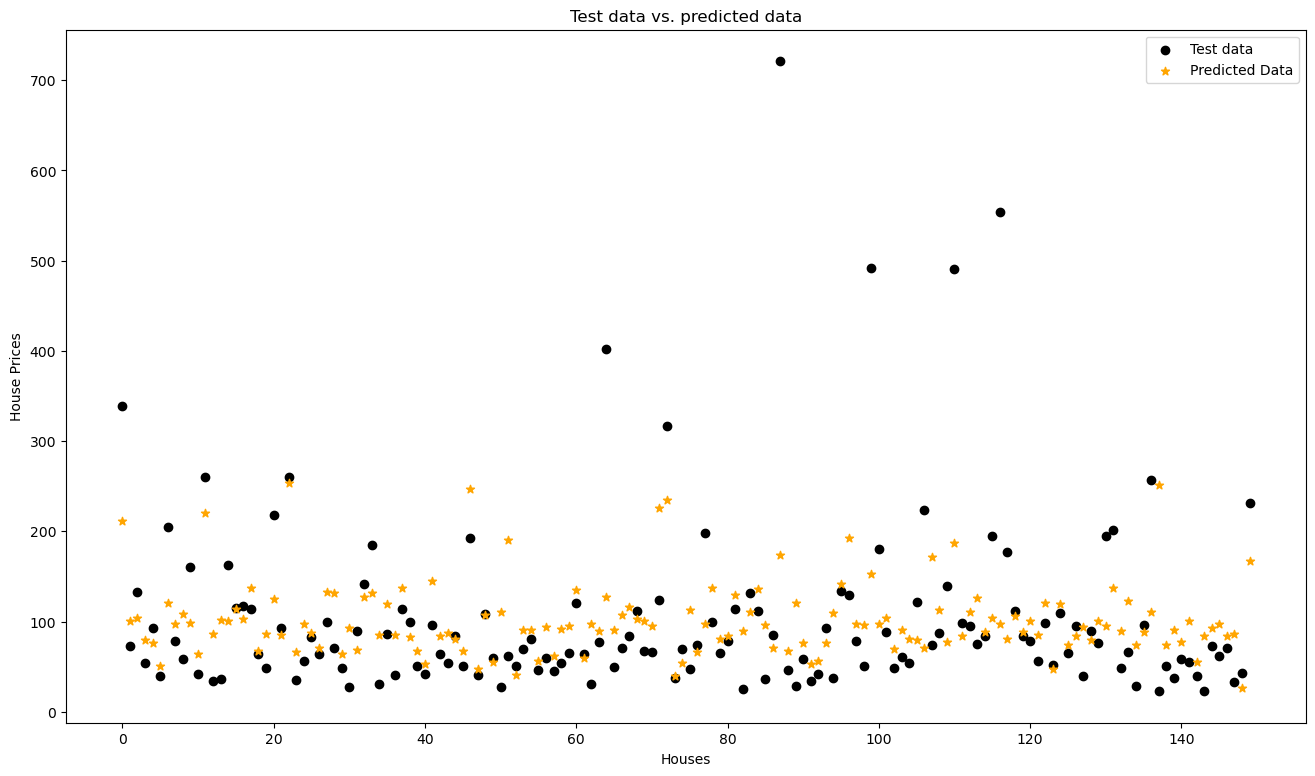

In [13]:
#Plotting original values(from dataset) vs. predicted values(from model)
import matplotlib.pyplot as plt
plt.figure(figsize = (16,9))
plt.scatter(range(len(y_test[:150])), y_test[:150], color = 'black', label = 'Test data')
plt.scatter(range(len(y_test_pred[:150])), y_test_pred[:150], color = 'orange', marker = '*', label = 'Predicted Data')
plt.xlabel('Houses')
plt.ylabel('House Prices')
plt.title('Test data vs. predicted data')
plt.legend()
plt.show()

In [14]:
check_y = y_test
type(check_y)
check_y['Predicted Price'] = y_test_pred
print(check_y.head(50))

          Price  Predicted Price
6006  339.00000       211.324070
1740   73.48000       100.197317
5976  133.00000       104.117876
2749   54.00000        79.116497
2960   93.24000        76.736623
1489   40.00000        51.105678
6086  205.00000       121.061777
3840   78.40000        97.870707
4878   58.14000       108.943778
3427  160.00000        98.452973
4818   42.00000        63.746477
4065  260.00000       220.050275
532    34.11999        86.552013
5211   36.00000       101.427816
3272  162.99999       100.944711
3387  115.00000       113.439049
3389  117.00000       102.828778
5982  113.99999       137.535274
620    63.88000        67.867539
2757   48.40000        86.553603
2418  218.00000       125.239258
2884   93.24000        85.045877
1277  260.00000       254.048349
5543   35.00000        66.225513
3856   56.61000        97.870707
1542   82.50000        87.543627
2660   64.00000        71.183584
5409  100.00000       132.676364
3094   70.62000       131.697452
3499   49.

In [15]:
#Taking a completely new value for x and predicting y
y_new_pred = regr.predict([[1200,3,0,0,0]])
y_new_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[70.44889143]])